In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
customers = pd.read_csv("C:\\Users\\patan Nishath khan\\Downloads\\Customers.csv")
products = pd.read_csv("C:\\Users\\patan Nishath khan\\Downloads\\Products.csv")
transactions = pd.read_csv("C:\\Users\\patan Nishath khan\\Downloads\\Transactions.csv")


# Preview data
print(customers.head())
print(products.head())
print(transactions.head())


  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3       

In [11]:
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])


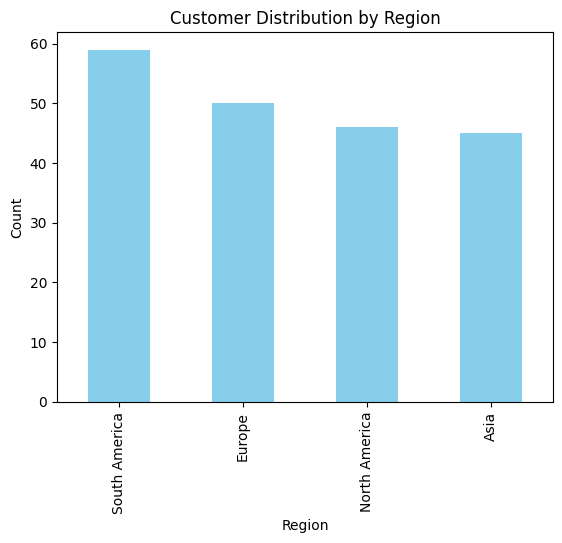

In [12]:
# Count customers by region
region_distribution = customers['Region'].value_counts()

# Plot
region_distribution.plot(kind='bar', color='skyblue', title='Customer Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.show()


   ProductID          ProductName     Category   Price
28      P029   TechPro Headphones  Electronics  433.64
53      P054   SoundWave Cookbook        Books   57.30
58      P059      SoundWave Jeans     Clothing  303.20
60      P061  HomeSense Desk Lamp   Home Decor  156.96
78      P079       ActiveWear Rug   Home Decor  417.37


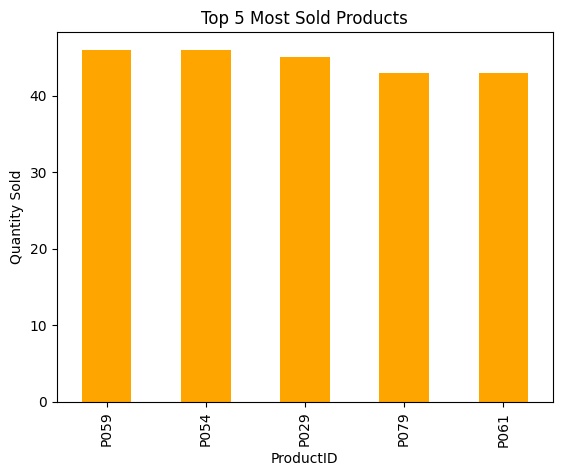

In [13]:
# Aggregate total quantity sold by ProductID
top_sold_products = transactions.groupby('ProductID')['Quantity'].sum().sort_values(ascending=False).head(5)

# Get product details
top_sold_products_details = products[products['ProductID'].isin(top_sold_products.index)]
print(top_sold_products_details)

# Plot
top_sold_products.plot(kind='bar', color='orange', title='Top 5 Most Sold Products')
plt.xlabel('ProductID')
plt.ylabel('Quantity Sold')
plt.show()


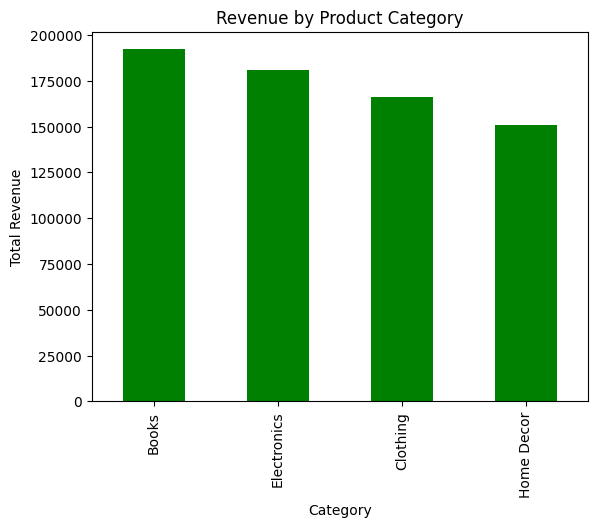

In [14]:
# Merge transactions with products
transactions_with_products = transactions.merge(products, on='ProductID')

# Calculate total revenue by category
revenue_by_category = transactions_with_products.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)

# Plot
revenue_by_category.plot(kind='bar', color='green', title='Revenue by Product Category')
plt.xlabel('Category')
plt.ylabel('Total Revenue')
plt.show()


C:\Users\patan Nishath khan\AppData\Local\Temp\ipykernel_7104\1031809228.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_signups = customers.set_index('SignupDate').resample('M').size()


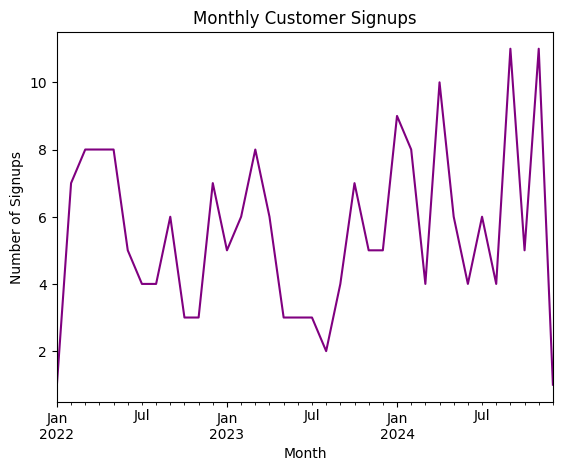

In [15]:
# Group by month and count signups
monthly_signups = customers.set_index('SignupDate').resample('M').size()

# Plot
monthly_signups.plot(color='purple', title='Monthly Customer Signups')
plt.xlabel('Month')
plt.ylabel('Number of Signups')
plt.show()


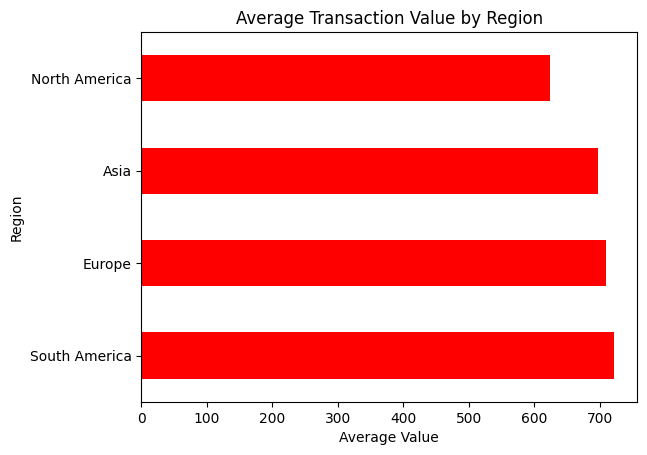

In [16]:
# Merge transactions with customers
transactions_with_customers = transactions.merge(customers, on='CustomerID')

# Calculate average transaction value by region
avg_transaction_by_region = transactions_with_customers.groupby('Region')['TotalValue'].mean().sort_values(ascending=False)

# Plot
avg_transaction_by_region.plot(kind='barh', color='red', title='Average Transaction Value by Region')
plt.xlabel('Average Value')
plt.ylabel('Region')
plt.show()
